## Костыра Екатерина ПМ_1901

## Занятие 8. Нелинейные модели для регрессии. Выбор лучшей модели для регрессии. Построение программного конвеера

Веберите любые данные для задачи регрессии из репозитория данных для машинного обучения (UCI Machine learning repository: http://archive.ics.uci.edu/ml/index.php) или возьмите свои данные и постройте нелинейные модели в соответствии со следующей схемой. Комментарии к каждому разделу обязательны.

Нелинейная регрессия (nonlinear regression) – регрессионная модель зависимости результативной переменной от одной или нескольких объясняющих переменных, выражаемая в виде нелинейной функции.


Все нелинейные модели регрессии могут быть разделены, как и линейные модели, на парные и множественные. По целям и решаемым задачам нелинейная регрессия аналогичная классической линейной регрессии. Отличие только в форме связи и методах оценки параметров.


Цель набора данных - диагностически предсказать, есть ли у пациента диабет, на основе определенных диагностических измерений, включенных в набор данных.

Наборы данных состоят из нескольких медицинских предикторов (независимых) и одной целевой (зависимой) переменной, результата . Независимые переменные включают количество беременностей у пациентки, их ИМТ, уровень инсулина, возраст и т. Д.

#### Информация об атрибутах:
1. preg - Количество беременных
2. plas - Глюкоза
3. pres - Кровяное давление (мм рт. Ст.)
4. skin - Толщина кожи (мм)
5. test - Инсулин
6. mass - Индекс массы тела (вес в кг / (рост в м) ^ 2)
7. pedi - Сахарный диабет
8. age - Возраст (лет)
9. class - Исход (Переменная класса (0, если не диабет, 1, если диабет) 268 из 768 равны 1, остальные равны 0)

In [1]:
import os
os.chdir("C:/Users/79811/anaconda3/")

### k-Nearest Neighbors

Aлгоритм k-ближайшего соседа

Классификация на основе соседей - это тип обучения на основе экземпляров или необобщающего обучения : он не пытается построить общую внутреннюю модель, а просто сохраняет экземпляры обучающих данных. Классификация вычисляется простым большинством голосов ближайших соседей каждой точки: точке запроса назначается класс данных, который имеет наибольшее количество представителей среди ближайших соседей точки.

KNeighborsClassifier реализует обучение на основе ближайшие соседи каждой точки запроса, где k - целочисленное значение, указанное пользователем

In [3]:
# KNN Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-0.20382433356117566


Оценка коэффициентов регрессии метода k-ближайших соседей равен -0.2

### Classification and Regression Trees

Деревья принятия решений

Дерево решений - это метод без распределения или непараметрический метод, который не зависит от предположений о распределении вероятностей. Деревья решений могут обрабатывать многомерные данные с хорошей точностью

In [5]:
# Decision Tree Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-0.3123547505126453


Оценка коэффициентов регрессии метода дерева решений равен -0.3

### Support Vector Machines

Машины опорных векторов (SVM) - это набор контролируемых методов обучения, используемых для классификации , регрессии и обнаружения выбросов. SVM предлагает очень высокую точность по сравнению с другими классификаторами, такими как логистическая регрессия и деревья решений. 

Основная идея SVM - найти максимальную маргинальную гиперплоскость (MMH), которая наилучшим образом разделяет набор данных на классы. Гиперплоскость - это плоскость принятия решений, которая разделяет набор объектов, имеющих различную принадлежность к классам

In [6]:
# SVM Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = SVR(gamma='auto')
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-0.2277502788938061


Оценка коэффициентов регрессии метода опорных векторов равен -0.2

По построенным ранее моделям выберите лучший алгоритм машинного обучения для задачи регрессии. Создайте пайплайн (программный конвеер) в соответствии с указанной ниже схемой. Комментарии к каждому разделу обязательны.

### Выбор лучшего алгоритма машинного обучения для задачи регрессии

LinRegr: -0.163207 (0.020251)
Ridge: -0.163193 (0.020235)
Lasso: -0.180128 (0.014991)
ElasticNet: -0.173557 (0.016831)
KNN: -0.203824 (0.033883)
DTree: -0.299351 (0.051639)
SVM: -0.174617 (0.020384)


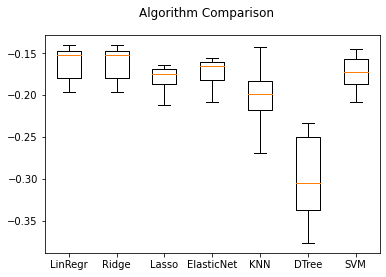

In [7]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare models
models = []
models.append(('LinRegr', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DTree', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Ящичковая диаграмма - это метод графического изображения групп числовых данных через их квартили. Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы.Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

По результатам видим:

Коэффициент линейной регрессии равен -0.16, а стандартное отклонение 0.02


Коэффициент гребневой регрессии равен -0.16, а стандартное отклонение 0.02


Коэффициент регрессии лассо равен -0.18, а стандартное отклонение 0.01


Коэффициент эластичной регрессии равен -0.17, а стандартное отклонение 0.01


Коэффициент регрессии метода k-ближайших соседей равен -0.2, а стандартное отклонение 0.03


Коэффициент регрессии метода деревьев принятия решений равен -0.3, а стандартное отклонение 0.05


Коэффициент регрессии метода опорных векторов равен -0.17, а стандартное отклонение 0.02


Поэтому можем сказать, что лучше всего работает алгоритм LR и Ridge, а хуже всего метод DTree

### Программный конвеер подготовки данных и моделирования

Конвейер обработки данных состоит из связанных между собой узлов, т.е. функций. Узел характеризуется набором входных и выходных каналов, по которым могут передаваться объекты. Узел ожидает появления определенного набора объектов на своем входном канале, после чего проводит вычисления и порождает объект(ы) на своем выходном канале, которые передаются в следующий узел в конвейере

In [8]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
# load data
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('DTree', DecisionTreeRegressor()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold,scoring=scoring)
print(results.mean())

-0.3136534518113465


Значение близко к 0, следовательно, конвеер работает хорошо

### Программный конвеер отбора признаков и моделирования

In [10]:
# Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
# load data
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# create feature union
features = []
features.append(('pca', PCA(n_components=4)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('LinRegr', LinearRegression()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold,scoring=scoring)
print(results.mean())

-0.16335901791191235


Значение близко к 0, следовательно, конвеер работает хорошо